## 1
Stress Intensity - measure of the magnitude of the local stress field

## 2

For a center-cracked panel with uniform remote stress, we must decide whether to use the Finite Width or Infinite Width formula. Since Width is given as a parameter, we will use the Finite Width equation.

$$K_I = \sigma \sqrt{\pi a} \sqrt{\sec (\pi a/W)} \tag{2.2a}$$

For $W/2a = 5$ we can substitute to find

$$K_I = \sigma \sqrt{\pi a}\sqrt{\sec (\pi/10)}$$

In [7]:
import numpy as np
K_I_center = np.sqrt(1/np.cos(np.pi/10))
K_I_center

1.0254083207377767

Thus
$$K_I = 1.025 \sigma \sqrt{\pi a}$$

For an edge-cracked panel, since $a/w < 0.6$ we use the simpler finite-width formula:

$$K_I = \sigma \sqrt{\pi a}\left[1.12 - 0.231 \frac{a}{W} + 10.55 \left(\frac{a}{W}\right)^2 - 21.71 \left(\frac{a}{W}\right)^3 + 30.82 \left(\frac{a}{W}\right)^4\right] \tag{2.4a}$$

Substituting $W/a = 5$ gives

$$K_I = \sigma \sqrt{\pi a}\left[1.12 - 0.231/5 + 10.55/25 - 21.71/125 + 30.82/625 \right]$$

In [2]:
K_I_edge = 1.12 - 0.231/5 + 10.55/25 - 21.71/125 + 30.82/625
K_I_edge

1.371432

Thus
$$K_I = 1.37 \sigma \sqrt{\pi a}$$

We can compare the two results, $K_{I,edge}/K_{I,center}$ to see the different effect the crack has for center and edge cracks

In [3]:
K_I_edge/K_I_center

1.3374496503141897

Thus a crack at the edge (for this given width) has a 33% stronger effect on the local stress than a center crack.

If we look at half of the center-crack specimen (so that it looks like an edge crack), there is an additional constraint (zero slope in y-deformation), this works to decrease the opening stress somewhat relative to the edge-cracked case.

## 3

For a through crack on one side of the hole, we use 2.12
$$K_I = \sigma \sqrt{\pi c}\beta $$
$$\beta = \beta_1 + \beta_2 \tag{2.12a}$$
$$\beta_1 = \beta_3F_wF_{ww} \tag{2.12b}$$
$$\beta_2 = \frac{\sigma_{br}}{\sigma} F_4 F_w F_{ww} \tag{2.12c}$$
$$\beta_3 = 0.7071 + 0.7548 \frac{R}{R+c} + 0.3415 \left(\frac{R}{R+c}\right)^2 + 0.6420 \left(\frac{R}{R+c}\right)^3 + 0.9196\left(\frac{R}{R+c}\right)^4 \tag{2.12d}$$
$$F_4 = 0.9580 + 0.2561 \frac{c}{R} - 0.00193 \left(\frac{c}{R}\right)^{2.5} - 0.9804 \left(\frac{c}{R}\right)^{0.5} \tag{2.12e}$$
$$F_w = \sqrt{\sec \frac{\pi R}{W} \sec \frac{\pi (R + c/2)}{W-c}} \tag{2.12f}$$
$$F_{ww} = 1 - N^{-\frac{W}{D}} \left(\frac{2c}{W-D}\right)^{\frac{W}{D} + 0.5}\tag{2.12g}$$

Where
$$\sigma_{br} = \frac{P}{Dt} = 0$$
We also check $2.65 - 0.24\left(2.75 - \frac{W}{D}\right)^2$ to find $N$


In [19]:
c = .085
D = .25
W = 7.0
R = D/2
print 2.65 - 0.24*(2.75-W/D)**2

-150.365


Since this is less than 2.275, we use $N=2.275$

In [20]:
N = 2.275
F_ww = 1-N**(-W/D)*(2*c/(W-D))**(W/D+0.5)
F_w = np.sqrt(1/np.cos(np.pi*R/W)/np.cos(np.pi*(R+c/2)/(W-c)))
F_4 = 0.958+0.2561*c/R-0.00193*(c/R)**2.5-0.9804*(c/R)**0.5
beta_3 = 0.7071 + 0.7548*R/(R+c) + 0.3415*(R/(R+c))**2 + 0.6420*(R/(R+c))**3 + + 0.9196*(R/(R+c))**4
beta_2 = 0
beta_1 = beta_3*F_w*F_ww
beta = beta_1 + beta_2
s = 10000/(7*.157)
K_I = s*np.sqrt(np.pi*c)*beta
print K_I

7201.84531444


Which gives $K_I = 7.20 \text{ ksi}\sqrt{\text{in.}}$

For symmetric through cracks around a hole we use the formula
$$K_I = \sigma \sqrt{\pi c}\beta $$
$$\beta = \beta_1 + \beta_2 \tag{2.11a}$$
$$\beta_1 = F_{c/R}F_wF_{ww} \tag{2.11b}$$
$$\beta_2 = \frac{\sigma_{br}}{\sigma} F_3 F_w F_{ww} \tag{2.11c}$$
$$F_{c/R} = \frac{3.404 + 3.1872 \frac{c}{R}}{1 + 3.9273\frac{c}{R} - 0.00695 \left(\frac{c}{R}\right)^2 } \tag{2.11d}$$
$$F_w = \sqrt{\sec \frac{\pi R}{W} \sec \frac{\pi (R+c)}{W}} \tag{2.11e}$$
$$F_{ww} = 1- \left(\left(1.32 \frac{W}{D} - 0.14\right)^{-(.98+\left(0.1\frac{W}{D}\right)^{0.1})}-0.02\right)\left(\frac{2c}{W-D}\right)^N \tag{2.11f}$$
$$F_3 = 0.098 + 0.3592 e^{-3.5089\frac{c}{R}} + 0.3817 e^{-0.5515 \frac{c}{R}} \tag{2.11g}$$

Where
$$\sigma_{br} = \frac{P}{Dt} = 0$$
We also check $\frac{W}{D} + 2.5$


In [21]:
c = .085
D = .25
W = 7.0
R = D/2
print W/D + 2.5

30.5


So we use $N=4.5$ (2.11j)

In [22]:
N = 4.5
s_br = 0
s = 10000/(7*.157)
F_cr = (3.404+3.1872*c/R)/(1+3.9273*c/R - 0.00695*(c/R)**2)
F_w = np.sqrt(1/np.cos(np.pi*R/W)/np.cos(np.pi*(R+c)/W))
F_ww = 1-((1.32*W/D-0.14)**(-(0.98+(0.1*W/D)**0.1))-.02)*(2*c/(W-D))**N
F_3 = 0.098 + 0.3592*np.exp(-3.5089*c/R)+0.3817*np.exp(-0.5515*c/R)
beta_1 = F_cr*F_w*F_ww
beta_2 = 0
beta = beta_1+beta_2
K_I = s*np.sqrt(np.pi*c)*beta
K_I

7164.7043903626191

Thus $K_I = 7.16 \text{ ksi}\sqrt{\text{in.}}$

For a quarter circular crack we use (3.1) with $a=c$. With no minor axis, it is not obvious which direction in which direction the maximum stress intensity factor will be, so we vary $\phi$ and plot to find the maximum.

8801.30807333


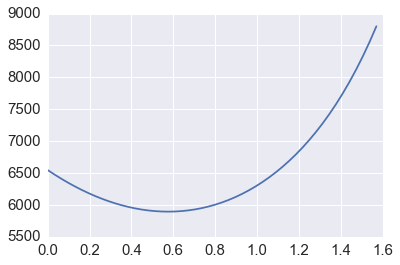

In [27]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(font_scale=1.5)
%matplotlib inline

a = c
phi = np.linspace(0,np.pi/2)
n = 1
b = w/2
r = R
t=0.157
fw = np.sqrt(1/np.cos(np.pi*r/(2*b))/np.cos((np.pi*(2*r+n*c)/(4*(b-c)+2*n*c)*np.sqrt(a/t))))
lam = 1/(1+c/r*np.cos(0.85*phi))
g2 = (1+0.358*lam+1.425*lam**2-1.578*lam**3+2.156*lam**4)/(1+0.13*lam**2)
M1 = 1.13 - 0.09*a/c
M2 = -0.54 + 0.89/(0.2+a/c)
M3 = 0.5 - 1/(0.65+a/c) + 14*(1-a/c)**24
Q = 1+1.464*(a/c)**1.65
g1 = 1+(0.1+0.35*(a/t)**2)*(1-np.sin(phi))**2
g3 = (1+0.04*(a/c))*(1+0.1*(1-np.cos(phi))**2)*(0.85+0.15*(a/t)**.25)
g4 = 1 - 0.7*(1-a/t)*(a/c-0.2)*(1-a/c)
f_phi = ((a/c)**2*np.cos(phi)**2+np.sin(phi)**2)**.25
Fch = (M1 +M2*(a/t)**2 + M3*(a/t)**4)*g1*g2*g3*g4*f_phi*fw
B = np.sqrt(1/Q)*Fch
KI_double = s*np.sqrt(np.pi*a)*B
KI_b = np.sqrt((4/np.pi + a*c/(2*t*r))/(4/np.pi+a*c/(t*r)))*KI_double
plt.figure()
plt.plot(phi,KI_b)
print max(KI_b)

This gives a maximum stress intensity at $\phi = \pi/2$ (i.e. in the direction of the hole) of $K_I = 8.80 \text{ ksi}\sqrt{\text{in.}}$

## 4

For a semi-elliptical surface flaw, we have three different equations, depending on the relative width and thickness of the panel

$$K_I = \sigma \sqrt{\frac{\pi a}{Q}} \left[\sin^2 \phi + \frac{a^2}{c^2} \cos^2 \phi\right]^{1/4}(1.1) \tag{2.8}$$

$$K_I = \sigma \sqrt{\frac{\pi a}{Q}} \left[\sin^2 \phi + \frac{a^2}{c^2} \cos^2 \phi\right]^{1/4}(1.1) M_K \tag{2.10}$$

$$K_I = \sigma \sqrt{\pi c} \sqrt{\frac{a}{c Q^\prime}} \left[M_1 + \left(\sqrt{\frac{Q^\prime c}{a}}-M_1\right)\left(\frac{a}{t}\right)^P\right]\sqrt{\sec \left(\frac{\pi c}{W} \sqrt{\frac{a}{t}}\right)} \tag{2.11}$$

$Q$ is the same for both (2.8) and (2.10), we calculate it using $Q = \Phi^2$ where $\Phi \approx \frac{\pi}{2} \left[1 - \frac{1}{4}\frac{c^2 - a^2}{c^2}\right]$

In [15]:
a = 0.2
c = 0.4
Phi = np.pi/2*(1-0.25*(c**2-a**2)/c**2)
Q = Phi**2

$M_k$ must be looked up on a chart, for this problem $a/2c = 0.25$ and $a/t = 0.36$, which from the figure gives $M_k = 1.05$

In [16]:
Mk = 1.05

Since the applied opening stress is given as $\sigma = 17.7\text{ ksi}$, and we know that the maximum stress intensity factor will occur when $\phi = \pi/2$, we can substitute values into equation (10) to find $K_I$

In [17]:
s = 17.7
KI10 = s*np.sqrt(np.pi*a/Q)*(1.1)*Mk
print KI10

12.6970239296


So we find $K_I = 12.7 \text{ ksi} \sqrt{\text{in.}}$

## 5

While we have no direct formula for an I-Beam, we can estimate the stress intensity factor using the edge-crack bending formula (2.5a) and replacing $\sigma$ with an effective stress using an I-Beam cross-section. i.e.
$$\sigma = \frac{6M}{tW^2} = \frac{My}{I}$$
We can calculate the inertia of the I-beam cross-section using the Parallel Axis Theorem
$$I = \sum \bar{I}_i + A d_i^2$$
Since this I-beam is symmetric, we only need to find the inertia of the middle section, $I_1$ and the top section, $I_2$

In [19]:
I_1 = 0.248*(8.14-2*.378)**3/12
I_2 = 5.268*0.378**3/12

We can now apply the parallel axis theorem, we need to include the top and bottom sections, which are equal so we multiply the top section by 2

In [20]:
I = I_1 + 2*(I_2+5.268*0.378*(8.14/2-.378/2)**2)
print I

68.3545285908


So the inertia of this segmernt is 68.4 $\text{in.}^4$

Next we calculate the bending moment for this beam using a free-body diagram, we find $M= 3000 (6)$ (ft-lb.), or in consistent units (in-lb.) $M= 3000(6)(12) = 1216000$ (in-lb.)

We use this to calculate the effective stress as $\sigma = \frac{M y}{I}$ with $y=W/2 = 4.07$

In [22]:
M = 3000*6*12
s = M*4.07/I
s

12861.181521160837

The crack will first need to propagate through the flange before it can affect the web, so we we consider $a/W = 0.3/5.268$, which we substitute into (2.5a)

In [23]:
aw = 0.3/6.268
beta = 1.122  - 1.4*aw + 7.33*aw**2 - 13.08*aw**3 +14.0*aw**4
KI = s*np.sqrt(np.pi*0.3)*beta
print KI

13365.0991657


Thus $K_I = 13.4 \text{ksi } \sqrt{\text{in.}}$

## 6

Since we are dealing with cracks along a curved boundary, both "short" and "long," we will use the combined method to interpolate between the two solutions.

For a short crack, we start by finding the stress concentration factor from p. 84. For that chart, $r/d = \frac{0.25}{4-(0.1+0.25)}$, we also have $D/d = \frac{4}{4-(0.1+0.25)}$

In [2]:
r = 0.25
d = 4-(.1+.25)
D = 4
print r/d
print D/d

0.0684931506849
1.09589041096


We find on the chart that $K_{tn} = 2.5$. Next we relate the given panel to one with a hole in the center and a very short crack on one side of the hole. For this case we find $K_{tg} = 3.05$.

Our next task is to convert the net stress equation into global stress. We do this by making a free-body cut through the crack plane. (See Example 6 on p. 86 of text). Since the force on the cut face acts slightly off-center, we need to also include a bending moment for the body to be in equilibrium.

In [3]:
s = 6 #ksi, applied stress
t = 0.375
P = s*D*t #equivalent force from applied stress
M = P*(2-d/2) #moment equal to force times eccentricity of load at mid-plane
sn = P/(d*t) + M*(d/2)/(t*3.65**3/12) #net stress is force/area + My/I

$K_{tg} \sigma = K_{tn} \sigma_n$ (equate net-stress concentration factor to global stress concentration factor)
$$K_{tg} = K_{tn} \sigma_n/\sigma $$

In [4]:
K_tn = 2.5
K_tg = K_tn*sn/s
print K_tg

3.52786639144


We can now find what $\sigma_A$ needs to be by equation $\sigma_{max,B}$ with $\sigma_{max,A}$

$$\sigma_{max,B} = \sigma_{max,A}$$
$$K_{tgB}\sigma = K_{tgA}\sigma_A$$
$$\frac{K_{tgB}}{K_{tgA}}\sigma = \sigma_A$$


In [5]:
sa = K_tg/3.05*s
print sa

6.94006503235


Since $K_{IA} = K_{IB}$ for short cracks, we can now find $K_I$ using a crack on one side of a hole (eq 2.12)

In [12]:
rc = 1 #for short cracks c = 0
B_3 = .7071+.7548+.3415+.6420+.9196
Fw = 1/np.cos(np.pi*.25/4)
Fww = 1 #because c=0
B_s = B_3*Fw*Fww*K_tg/3.05
B_3

3.3649999999999998

So the $\beta_S$ for short cracks is 4.60. For long cracks we use the formula for edge cracks in a finite panel, where the extra geometry, $e$ is 0.35

In [9]:
e = 0.35
W = 4.0
c = np.linspace(0,1,100)
aw = (c+e)/W
B = 1.122 - 0.231*aw + 10.55*aw**2 - 21.71*aw**3 + 30.82*aw**4
B_l = np.sqrt((c+e)/c)*B

C:\Miniconda\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in divide


We now find the tangent curve to generate a cohesive plot

In [58]:
from scipy import interpolate
#interpolate our discrete points
spl = interpolate.splrep(c[1:],B_l[1:])
x1 = 0.054 #guess, adjust until they match
fa = interpolate.splev(x1,spl,der=0)
fprime = interpolate.splev(x1,spl,der=1)
print fa-fprime*x1
print B_s #(to find x1)

4.60365899284
4.60342856358


And we plot the full result

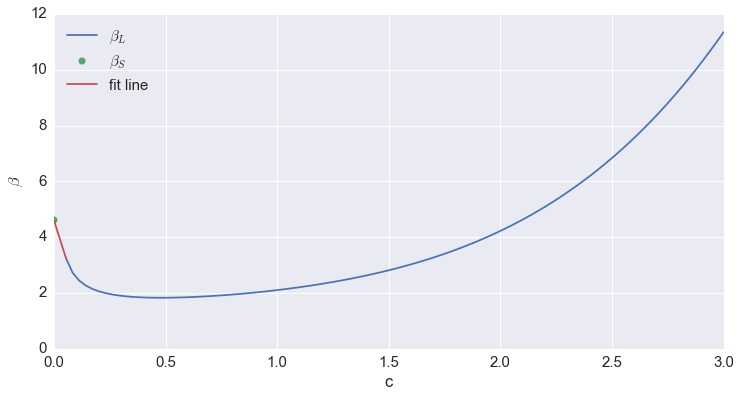

In [59]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(font_scale=1.5)
%matplotlib inline
plt.figure(figsize=(12,6))
c = np.linspace(x1,3,100)#only plot B_l from end of tangent
shortc = np.linspace(0,x1)
aw = (c+e)/W
B = 1.122 - 0.231*aw + 10.55*aw**2 - 21.71*aw**3 + 30.82*aw**4
B_l = np.sqrt((c+e)/c)*B
plt.figure(figsize=(12,6))
plt.plot(c,B_l,label=r'$\beta_L$')
plt.plot(0,B_s,'o',label=r'$\beta_S$')
plt.plot(shortc,fa+fprime*(shortc-x1),label='fit line')
plt.xlabel('c')
plt.ylabel(r'$\beta$')
plt.legend(loc='best')

Visually, we can see that for part a we are using only the long crack formula, calculating $K_I$:

In [60]:
c = 0.5
a = c + e
aw = a/W
B = 1.122 - 0.231*aw + 10.55*aw**2 - 21.71*aw**3 + 30.82*aw**4
K_I = s*np.sqrt(np.pi*a)*B
print K_I

13.7642027123


So $K_I = 13.76 \text{ksi } \sqrt{\text{in.}}$

For part b we need to use our linear interpolation, we find that 

In [61]:
c = 0.025
B = fa+fprime*(c-x1)
print B

3.97574236677


Substituting this $\beta$ in gives

In [62]:
K_I = s*np.sqrt(np.pi*c)*B
print K_I

6.68520031332


## 7

First let us calculate the stress intensity factor without stiffeners, for a wide panel we have $K_I = \sigma \sqrt{\pi a}$

In [64]:
a = 10./2.
s = 10. #ksi
K_I = s*np.sqrt(np.pi*a)
print K_I

39.6332729761


We model the stiffeners using compounding with a stiffening effect of $\beta_S=0.9$.
Using Method I we find

In [65]:
K_I = s*np.sqrt(np.pi*a)*(1+(0.9-1))
print K_I

35.6699456785


With Method 2 we find:

In [67]:
K_I = s*np.sqrt(np.pi*a)*0.9
print K_I

35.6699456785


For this case, they are identical and provide a moderate reduction in stress intensity factor compared to the case with no stiffeners.

In [69]:
(39.6-35.7)/39.6

0.09848484848484844

The stiffeners reduce the stress intensity factor by about 10%

## 8

For a corner crack as indicated in Problem 8, we can superpose the lug corner-crack and bending corner-crack solutions (p. 63 and p. 64).

## 9

If we assume that the load is transmitted equally between all bolts, we will have $P=2000$ lb. The portion for a tensile load is given by

In [93]:
c = .08
a = .06
D = .375
w = 4
t = .125
P = 2000
phi = np.pi/2
z = (1+2*c/D*np.cos(.85*phi))**-1
f0 = .7071 + .7548*z + .3415*z**2 + .642*z**3 + .9196*z**4
f1 = .078*z + .7588*z**2 - .4293*z**3 + .0644*z**4 + .651*z**5
d0 = 1+.13*z**2
gp = ((w+D)/(w-D))**.5
x = a/c
v = a/t
lam = (np.pi/2)*v**.5*((D+c)/(w-c))
fw = (1/np.cos(lam)/np.cos(np.pi*D/(2*w)))**.5
#a/c < 1
f_phi = ((a/c*np.cos(phi))**2+np.sin(phi)**2)**.25
f_x = (1+1.464*(a/c)**1.65)**-.5
M0 = (1.13-0.09*x)+(-.54+.89/(.2+x))*v**2+(.5-1/(.65-x) + 14*(1-x)**24)*v**4
g1 = 1 + (0.1+0.35*v**2)*(1-np.sin(phi))**2
g3 = (1+0.04*x)*(1+0.1*(1-np.cos(phi))**2)*(0.85+0.15*v**.25)
g4 = 1-0.7*(1-v)*(x-0.2)*(1-x)
Gw = M0*g1*g3*g4*f_phi*f_x*fw
G0 = f0/d0
G1 = f1*gp/d0
F0 = (G0*D/(2*w)+G1)*Gw
KI_t = P/(D*t)*np.sqrt(np.pi*c)*F0
print KI_t

26252.0019303


While the portion for bending is given as

In [94]:
M = 6000 * .125 #bending moment
t = .125
b = 2
I = b*t**3/6
r = D/2
lam = 1/(1+(c/r)*np.cos(.85*phi))
g2 = (1+.358*lam+1.425*lam**2-1.578*lam**3+2.156*lam**4)/(1+0.13*lam**2)
# for a/c < 1
M1 = 1.13-0.09*a/c
M2 = -0.54 + 0.89/(0.2+a/c)
M3 = 0.5 - 1/(.65+a/c)+14*(1-a/c)**4
Q = 1+1.464*(a/c)**1.65
g1 = 1 + (0.1+0.35*(a/t)**2)*(1-np.sin(phi))**2
g3 = (1+0.04*a/c)*(1+0.1*(1-np.cos(phi))**2)*(0.85+0.15*(a/t)**.25)
g4 = 1 - 0.7*(1-a/t)*(a/c-0.2)*(1-a/c)
f_phi = ((a/c)**2*np.cos(phi)**2+np.sin(phi)**2)**.25
G11 = -0.43-.74*a/c-0.84*(a/c)**2
G12 = 1.25-1.19*a/c+4.39*(a/c)**2
G13 = -1.94 + 4.22*a/c - 5.51*(a/c)**2
G21 = -1.5 - 0.04*a/c - 1.73*(a/c)**2
G22 = 1.71 - 3.17*a/c + 6.84*(a/c)**2
G23 = -1.28 + 2.71*a/c - 5.22*(a/c)**2
p = 0.1+1.3*a/t+1.1*a/c - 0.7*(a/c)*(a/t)
n = 1
fw = np.sqrt(1/np.cos(np.pi*r/(2*b))/np.cos(np.pi*(2*r+n*c)/(2*(b-c)+2*n*c)*np.sqrt(a/t)))
Fch = (M1+M2*(a/t)**2+M3*(a/t)**4)*g1*g2*g3*g4*f_phi*fw
H1 = 1 + G11*a/t+G12*(a/t)**2+G13*(a/t)**3
H2 = 1 + G21*a/t + G22*(a/t)**2 + G23*(a/t)**3
Hch = H1 + (H2-H1)*np.sin(phi)**p
B = Hch*np.sqrt(a/(c*Q))*Fch
s_b = M*t/(2*I)
KI_b = s_b*np.sqrt(np.pi*c)*B
print KI_b

20266.4306001


By superposition we can add these two solutions to get an estimate of the total stress intensity factor

In [95]:
KI = KI_t + KI_b
print KI

46518.4325304


$K_I = 46.5 \text{ksi } \sqrt{\text{in.}}$

## 10

For a very wide center-cracked plate, we use (2.6) and (2.7) (p 52 in text) with $a/W = 0$

In [32]:
B = 1
P = 4650
t = 0.2
a = 0.49/2.
KI = P/(t*np.sqrt(np.pi*a))*B
print KI

26501.1657695


This gives $K_I = 26.5 \text{ksi } \sqrt{\text{in.}}$

## 11

In Panel 1 we use the same expression as in problem 10, namely 2.6 and 2.7

$$K_I = \frac{P}{t \sqrt{\pi a}}\beta \tag{2.6}$$
$$\beta = \frac{1 - 0.5\left(\frac{a}{W}\right)+0.975\left(\frac{a}{W}\right)^2 - 0.16\left(\frac{a}{W}\right)^3}{\sqrt{1-\left(\frac{a}{W}\right)}} \tag{2.7}$$

In Panel 2, we need to use superposition to find an appropriate expression. See the following figure to view the superposition we use.

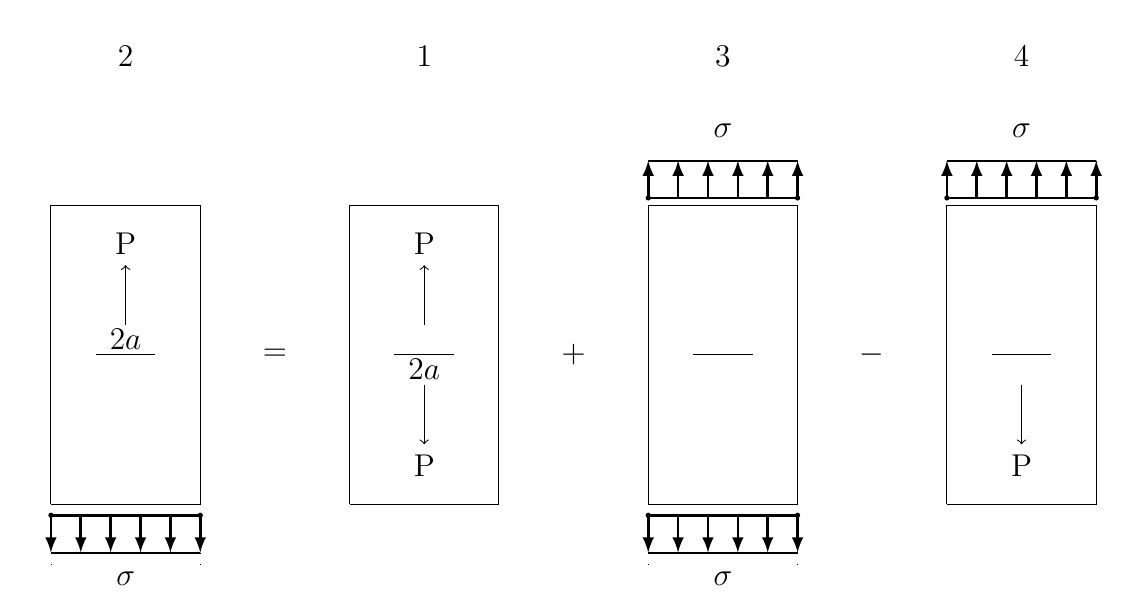

In [98]:
from IPython.display import Image
Image('1-11a.png')

Since Panels 2 and 4 will give equivalent stress intensity factors, we can add Panel 4 to both sides to get
$$K_{I2} + K_{I4} = K_{I1} + K_{I3}$$
$$2K_{I2} = K_{I1} + K_{I3}$$
$$K_{I2} = \frac{1}{2}(K_{I1} + K_{I3})$$

We can now substutite the known equations for $K_{I1}$ and $K_{I3}$ to find
$$K_{I2} = \frac{1}{2}\left(\frac{P}{t \sqrt{\pi a}}\beta_1 + \sigma \sqrt{\pi a} \sqrt{\sec (\pi a/W)} \right)$$
$$\beta_1 = \frac{1 - 0.5\left(\frac{a}{W}\right)+0.975\left(\frac{a}{W}\right)^2 - 0.16\left(\frac{a}{W}\right)^3}{\sqrt{1-\left(\frac{a}{W}\right)}}$$

## 12

There are many different geometric configurations we could use to make this comparison. Here I will use two different configurations: one in which $R = L = a/2$ and one in which I hold $R$ constant, making $L = a - R$. In both cases I assume the panel is very wide.

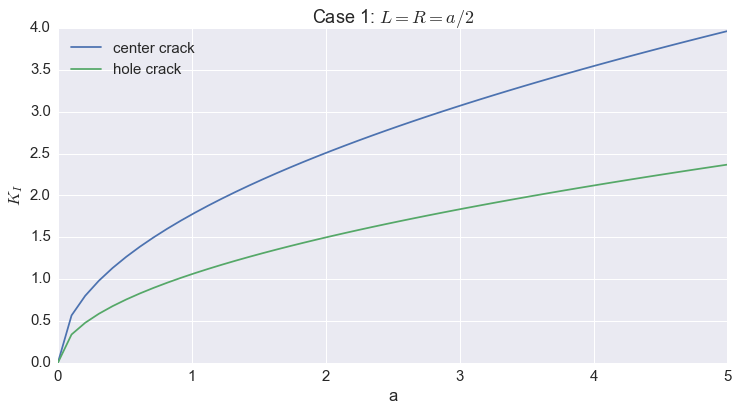

In [102]:
#case 1, r = L = a/2
a = np.linspace(0,5)
r = a/2
l = a/2
K_I1 = np.sqrt(np.pi*a)

#beta2 = 0, c/r = l/r = 1, w/d = infinity, r/w = 0
Fcr = (.3404+3.8172)/(1+3.9273-0.00695)
Fw = 1
Fww = 1
B = Fcr*Fw*Fww
K_I2 = np.sqrt(np.pi*l)*B

import matplotlib.pyplot as plt
import seaborn as sb
sb.set(font_scale=1.5)
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(a,K_I1,label='center crack')
plt.plot(a,K_I2,label='hole crack')
plt.legend(loc='best')
plt.xlabel('a')
plt.ylabel('$K_I$')
plt.title('Case 1: $L = R = a/2$')

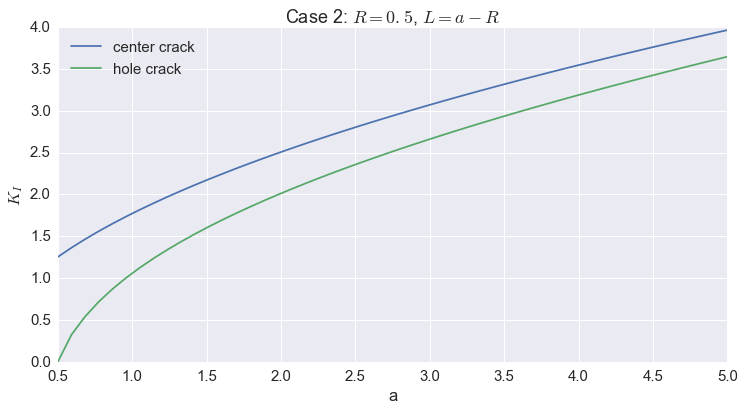

In [104]:
#case 2, r = const, L = a - R
r = 0.5
a = np.linspace(r,5)
l = a - r
K_I1 = np.sqrt(np.pi*a)
#beta2 = 0, c/r = l/r, w/d = infinity, r/w = 0
cr = l/r
Fcr = (.3404+3.8172*cr)/(1+3.9273*cr-0.00695*cr**2)
Fw = 1
Fww = 1
B = Fcr*Fw*Fww
K_I2 = np.sqrt(np.pi*l)*B

plt.figure(figsize=(12,6))
plt.plot(a,K_I1,label='center crack')
plt.plot(a,K_I2,label='hole crack')
plt.legend(loc='best')
plt.xlabel('a')
plt.ylabel('$K_I$')
plt.title('Case 2: $R = 0.5$, $L = a - R$')

In both cases, the center crack has a larger stress intensity than the hole crack, although for a constant hole size, the longer the crack is the more the solutions appear to converge.

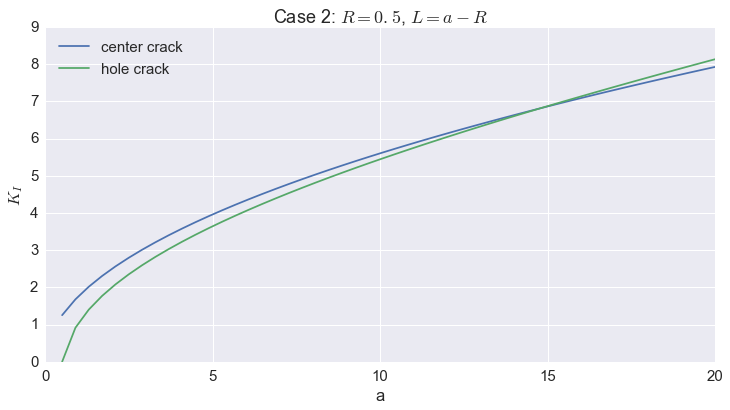

In [105]:
#case 2, r = const, L = a - R
r = 0.5
a = np.linspace(r,20)
l = a - r
K_I1 = np.sqrt(np.pi*a)
#beta2 = 0, c/r = l/r, w/d = infinity, r/w = 0
cr = l/r
Fcr = (.3404+3.8172*cr)/(1+3.9273*cr-0.00695*cr**2)
Fw = 1
Fww = 1
B = Fcr*Fw*Fww
K_I2 = np.sqrt(np.pi*l)*B

plt.figure(figsize=(12,6))
plt.plot(a,K_I1,label='center crack')
plt.plot(a,K_I2,label='hole crack')
plt.legend(loc='best')
plt.xlabel('a')
plt.ylabel('$K_I$')
plt.title('Case 2: $R = 0.5$, $L = a - R$')

Indeed, when we allow the crack to get longer, we find that the hole crack begins to have a larger stress intensity than the center crack.

## 13

For this problem we can use a superposition we already found previously in Problem 11. If we superpose the solution for 11 with  a center crack under remote stress we will have the same conditions as here.

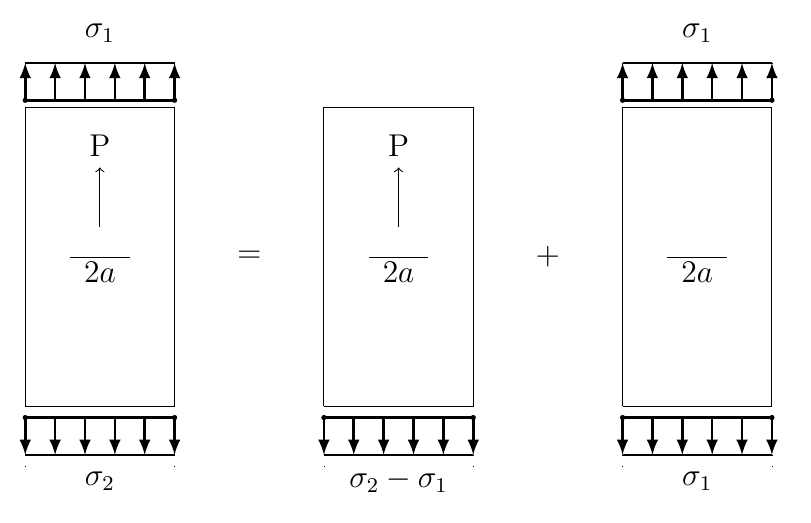

In [107]:
Image('1-13.png')

This gives:

$$K_{I} = \frac{1}{2}\left(\frac{P}{t \sqrt{\pi a}}\beta_1 + (\sigma_2-\sigma_1) \sqrt{\pi a} \sqrt{\sec (\pi a/W)} \right) + \sigma_1 \sqrt{\pi a}\sqrt{\sec (\pi a/W)}$$
$$\beta_1 = \frac{1 - 0.5\left(\frac{a}{W}\right)+0.975\left(\frac{a}{W}\right)^2 - 0.16\left(\frac{a}{W}\right)^3}{\sqrt{1-\left(\frac{a}{W}\right)}}$$

Which we can simplify to
$$K_{I} = \frac{1}{2}\left(\frac{P}{t \sqrt{\pi a}}\beta_1 + (\sigma_2+\sigma_1) \sqrt{\pi a} \sqrt{\sec (\pi a/W)} \right)$$

## 14
In this problem we have the same configuration as in (2.11) (Case 11 on p 53 of text). We "plug and chug."

In [37]:
c = 1.
t = 0.25
P = 8000.*t
D = 0.375
W = 6.
r = D/2.
cr = c/r
Fcr = (.3404+3.8172*cr)/(1+3.9273*cr-0.00695*cr**2)
Fw = np.sqrt(1/np.cos(np.pi*r/W)/np.cos(np.pi*(r+c)/W))
N = W/D + 2.5
if N > 4.5:
    N = 4.5
Fww = 1-((1.32*W/D-0.14)**-(.98+(0.1*W/D)**.1) - 0.02)*(2*c/(W-D))**N
F3 = 0.098 + 0.3592*np.exp(-3.5089*cr) + 0.3817*np.exp(-0.5515*cr)
s = 5000.
s_br = P/(D*t)
B1 = Fcr*Fw*Fww
B2 = s_br/s*F3*Fw*Fww
B = B1 + B2
KI = s*np.sqrt(np.pi*c)*B
print KI

14347.8596934


So the stress intensity factor for this case is $K_I = 14.3 \text{ksi } \sqrt{ \text{in.}}$

## 15

For part a we have

In [34]:
a = 6.0
s = 10.0
w = 15.0
KIa = 1.12*s*np.sqrt(np.pi*a)
print KIa

48.6260043063


Which gives $K_I = 48.6 \text{ksi } \sqrt{ \text{in.}}$

In part b we use (2.4a) (case 5 p 51)

In [35]:
aw = a/w
B = 1.122 - 0.231*aw + 10.55*aw**2 - 21.71*aw**3 + 30.82*aw**4
KIb = s*np.sqrt(np.pi*a)*B
print KIb

91.9184305974


Which gives $K_I = 91.9 \text{ksi } \sqrt{ \text{in.}}$

Here the difference is signficant. The assumptions that $\beta = 1.12$ is only appropriate when $a/W$ is very small, as in the following where we consider $a=0.5$

In [36]:
a = 0.5
s = 10.0
w = 15.0
KIa = 1.12*s*np.sqrt(np.pi*a)
print KIa

aw = a/w
B = 1.122 - 0.231*aw + 10.55*aw**2 - 21.71*aw**3 + 30.82*aw**4
KIb = s*np.sqrt(np.pi*a)*B
print KIb

14.0371183379
14.1029950047


## 16

In this problem we compare (2.12) (case 12 p 53) to 3.1 (case 18 p. 56). For a through crack we have

In [29]:
d = 0.375
r = d/2
c = .075
w = 0.96
t = 0.15
s = 20
rrc = r/(r+c)
cr = c/r
#no bearing stress, B2 = 0
B3 = 0.7071 + 0.7548*rrc + 0.3415*rrc**2 + .6420*rrc**3 + 0.9196*rrc**4
Fw = np.sqrt(1/np.cos(np.pi*r/w)/np.cos(np.pi*(r+c/2)/(w-c)))
N = 2.65 - 0.24*(2.75-w/d)**2
if N < 2.275:
    N = 2.275
Fww = 1-N**(-w/d)*(2*c/(w-d))**(w/d+0.5)
B = B3*Fw*Fww
K_Ia = s*np.sqrt(np.pi*c)*B
print K_Ia

24.3127183417


Which gives a stress intensity of $K_I = 24.3 \text{ksi } \sqrt{ \text{in.}}$

For a quarter circular crack, we use 3.1 (with $a=c$). Also it does not matter what we use for $\phi$ in this case, so we let $\phi = 0$

22.1230461218


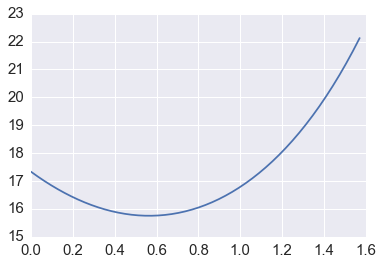

In [30]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(font_scale=1.5)
%matplotlib inline

a = c
phi = np.linspace(0,np.pi/2)
n = 1
b = w/2
fw = np.sqrt(1/np.cos(np.pi*r/(2*b))/np.cos((np.pi*(2*r+n*c)/(4*(b-c)+2*n*c)*np.sqrt(a/t))))
lam = 1/(1+c/r*np.cos(0.85*phi))
g2 = (1+0.358*lam+1.425*lam**2-1.578*lam**3+2.156*lam**4)/(1+0.13*lam**2)
M1 = 1.13 - 0.09*a/c
M2 = -0.54 + 0.89/(0.2+a/c)
M3 = 0.5 - 1/(0.65+a/c) + 14*(1-a/c)**24
Q = 1+1.464*(a/c)**1.65
g1 = 1+(0.1+0.35*(a/t)**2)*(1-np.sin(phi))**2
g3 = (1+0.04*(a/c))*(1+0.1*(1-np.cos(phi))**2)*(0.85+0.15*(a/t)**.25)
g4 = 1 - 0.7*(1-a/t)*(a/c-0.2)*(1-a/c)
f_phi = ((a/c)**2*np.cos(phi)**2+np.sin(phi)**2)**.25
Fch = (M1 +M2*(a/t)**2 + M3*(a/t)**4)*g1*g2*g3*g4*f_phi*fw
B = np.sqrt(1/Q)*Fch
KI_double = s*np.sqrt(np.pi*a)*B
KI_b = np.sqrt((4/np.pi + a*c/(2*t*r))/(4/np.pi+a*c/(t*r)))*KI_double
plt.figure()
plt.plot(phi,KI_b)
print max(KI_b)

Thus the stress intensity factor for a quarter circular crack is only $K_I = 22.1 \text{ksi } \sqrt{ \text{in.}}$

## 17

Although this looks like it would fit the geometry in (2.11) (case 11 p 53), a remote stress of 0 will give an error in the formula, so instead we operate under the assumption that the circle is so small that we can use center-crack formulas.
This superposition will be identical to problem 11.

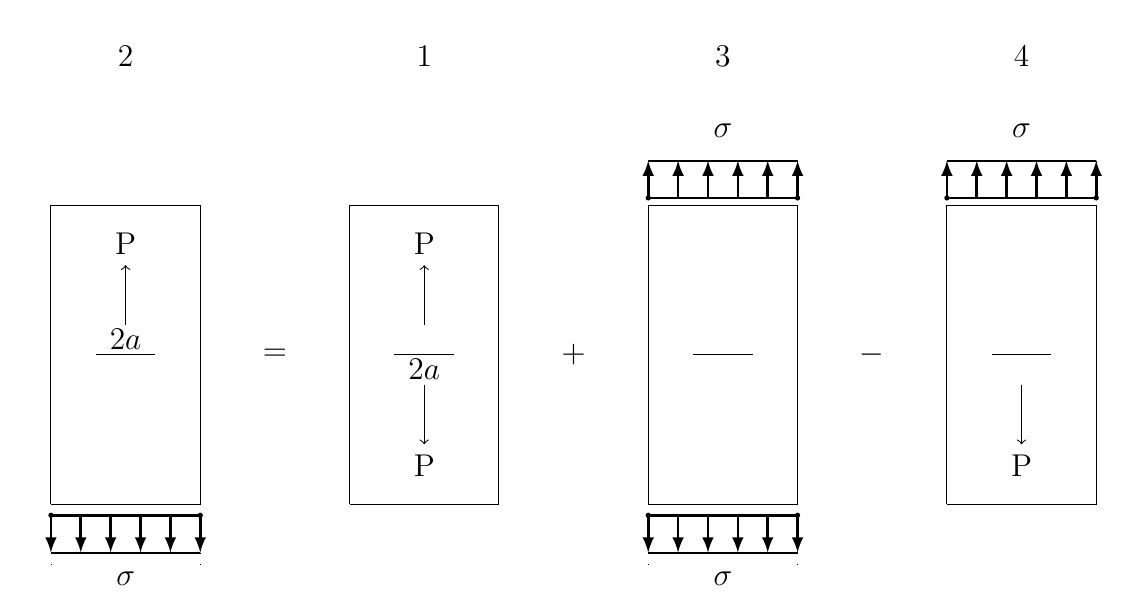

In [132]:
Image('1-11a.png')

Which gives

$$K_{I2} = \frac{1}{2}\left(\frac{P}{t \sqrt{\pi a}}\beta_1 + \sigma \sqrt{\pi a} \sqrt{\sec (\pi a/W)} \right)$$
$$\beta_1 = \frac{1 - 0.5\left(\frac{a}{W}\right)+0.975\left(\frac{a}{W}\right)^2 - 0.16\left(\frac{a}{W}\right)^3}{\sqrt{1-\left(\frac{a}{W}\right)}}$$